In [90]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras
from tensorflow.keras import layers
import keras
import matplotlib.pyplot as plt

In [91]:
# Dataset reading

In [92]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
insurance["age"], insurance["smoker"]

(0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64,
 0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object)

In [94]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [95]:
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot["charges"]

In [96]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [97]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [100]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


# Network Building

In [122]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

history = insurance_model.fit(X_train, y_train,epochs=100)

insurance_model.summary()

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 13341.5918 - mae: 13341.5918
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13325.6846 - mae: 13325.6846
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13280.2646 - mae: 13280.2646
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 13155.3428 - mae: 13155.3428
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 12837.5693 - mae: 12837.5693
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 12073.1572 - mae: 12073.1572
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 10479.0654 - mae: 10479.0654
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 8372.5303 - mae: 8372.5303
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7454.5405 - mae: 7454.5405
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7416.9844 - 

In [123]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4254.8662 - mae: 4254.8662


[4254.8662109375, 4254.8662109375]

Text(0.5, 0, 'epochs')

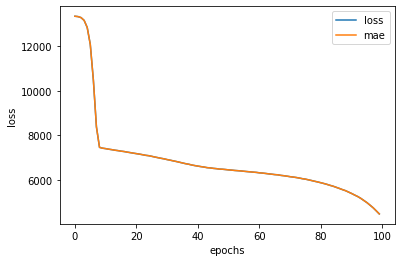

In [125]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")